# Task 1: Clustering Techniques

Alex Rivera ID#011243153

Western Governors University

D212 - Data Mining  II 

November 05, 2023

## A1: Proposal Of Question

The research question for this project is, "Can the hierarchical clustering algorithm significantly segment customers?"

## A2: Defined Goal

The goal of this analysis is to see if hierarchical clustering can assist in significantly segmenting customers into similar groups. This analysis will aid in providing insights into customers with similar or dissimilar characteristics. The segmentations can assist with putting strategies in places to target these customers for services and improved retention. 

## B1: Explanation Of The Clustering Technique

The hierarchical clustering technique is an algorithm used to achieve unsupervised clustering. The definition of clustering is important, "a technique that groups similar data points such that the points in the same group are more similar to each other than the points in the other groups" (Patlolla, 2020). In this project, agglomerative hierarchical clustering was implemented. Patlolla's article describe the agglomerative hierarchical technique at a high level:

    The basic algorithm of Agglomerative is straightforward.

    - Compute the proximity matrix
    - Let each data point be a cluster
    - Repeat: Merge the two closest clusters and update the proximity matrix
    - Until only a single cluster remains (Patlolla, 2020) 
    
The expected outcome of the hierarchical clustering technique is achieving data point clusters that are similar in grouping compared to other data point clusters. 

## B2: Summary Of Technique Assumption

The main assumption for the hierarchical clustering technique according to Lazar is, "It is always assumed that the sample is representative of the population" (Lazar, n.d.). According to this assumption, the clustering technique will help achieve the goal of segmenting customers by similar or dissimilar groups to analyze with a simple algorithm.

## B3: Packages Or Libraries List

* **Pandas** library will be used for data manipulation and analysis throughout the project. 
    * CategoricalDtype Pandas class will be used for converting data types to categorical. 
* **Matplotlib** will used for visualizing the silhouette scores of the clusters. 
* **Sklearn** is a machine learning library that will be used to implement the hierarchical clustering algorithm.  
    * AgglomerativeClustering Sklearn class will be used for modeling the Agglomerative Clustering algorithm.  
    * pairwise_distances Sklearn class will be used for computing the distances matrix used to implmented the algorithm. 
    * silhouette_score Sklearn class will be used for computing the mean silhouette coefficient. 

In [1]:
#Importing necessary packages for the Clustering Technique project 
import pandas as pd 
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances
from sklearn.metrics import silhouette_score

## C1: Data Preprocessing

The data preprocessing method that applies to hierarchical clustering is one hot encoding, my previous project was referenced throughout this task(Rivera, 2023). Ganji's article went over the reasons for implementing it, "One hot encoding is a technique that we use to represent categorical variables as numerical values in a machine learning model"(Ganji, 2023). Since machine learning models take in numerical data all categorical data needs to be converted to either 0 or 1. For binary categorical data, this encoding was straightforward by implementing the following function to the dataframe replace('Yes', 1) and replace('No', 0). For categorical data with more than two steps creating dummies for each category was necessary. For example, the get_dummies(data=cluster_churn["InternetService"]) allowed the InternetService categorical variables to create two separate columns for Internet_Fiber_Optic and Internet_None all with numerical data. All new columns were inserted into the new data frame and the original variable nonnumerical was dropped, this data can now be implemented into the hierarchical clustering method.  

## C2: Data Set Variables

* Categorical: InternetService
* Categorical: OnlineSecurity
* Categorical: OnlineBackup
* Categorical: DeviceProtection
* Categorical: TechSupport
* Categorical: StreamingTV
* Categorical: StreamingMovies

## C3: Steps For Analysis

My previous D209 project was referenced throughout this task(Rivera, 2023).

#### Loading the churn dataset flat file into a pandas dataframe and running info() for an overview.

In [2]:
churn = pd.read_csv('C:/Users/alexa/WGU/D212/Project/churn_clean.csv', index_col=0)

churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer_id           10000 non-null  object 
 1   Interaction           10000 non-null  object 
 2   UID                   10000 non-null  object 
 3   City                  10000 non-null  object 
 4   State                 10000 non-null  object 
 5   County                10000 non-null  object 
 6   Zip                   10000 non-null  int64  
 7   Lat                   10000 non-null  float64
 8   Lng                   10000 non-null  float64
 9   Population            10000 non-null  int64  
 10  Area                  10000 non-null  object 
 11  TimeZone              10000 non-null  object 
 12  Job                   10000 non-null  object 
 13  Children              10000 non-null  int64  
 14  Age                   10000 non-null  int64  
 15  Income             

#### Setting options to view max columns for review during data cleaning and viewing dataframe.

In [3]:
pd.set_option("display.max_columns", None)

churn

,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
CaseOrder,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4
2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1,27,21704.77,Married,Female,Yes,11.699080,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4
3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4,50,9609.57,Widowed,Female,No,10.752800,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3
4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1,48,18925.23,Married,Male,No,14.913540,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3
5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0,83,40074.19,Separated,Male,Yes,8.147417,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,M324793,45deb5a2-ae04-4518-bf0b-c82db8dbe4a4,9499fb4de537af195d16d046b79fd20a,Mount Holly,VT,Rutland,5758,43.43391,-72.78734,640,Rural,America/New_York,Sport and exercise psychologist,3,23,55723.74,Married,Male,No,9.415935,12,2,0,No,Month-to-month,Yes,Yes,DSL,Yes,Yes,No,Yes,Yes,No,No,No,No,Electronic Check,68.197130,159.979400,6511.252601,3,2,3,3,4,3,2,3
9997,D861732,6e96b921-0c09-4993-bbda-a1ac6411061a,c09a841117fa81b5c8e19afec2760104,Clarksville,TN,Montgomery,37042,36.56907,-87.41694,77168,Rural,America/Chicago,Consulting civil engineer,4,48,34129.34,Divorced,Male,No,6.740547,15,2,0,No,Two Year,No,No,Fiber Optic,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,Electronic Check,61.040370,207.481100,5695.951810,4,5,5,4,4,5,2,5
9998,I243405,e8307ddf-9a01-4fff-bc59-4742e03fd24f,9c41f212d1e04dca84445019bbc9b41c,Mobeetie,TX,Wheeler,79061,35.52039,-100.44180,406,Rural,America/Chicago,IT technical support officer,1,48,45983.43,Never Married,Female,No,6.590911,10,0,0,No,Month-to-month,No,No,Fiber Optic,Yes,Yes,Yes,Yes,No,No,No,No,Yes,Bank Transfer(automatic),47.416890,169.974100,4159.305799,4,4,4,4,4,4,4,5


#### Detecting duplicates and checking if Customer_id is unique. 

In [4]:
print(churn.duplicated().value_counts())

churn['Customer_id'].is_unique

False    10000
dtype: int64


True

#### Detecting null values in the dataframe.

In [5]:
churn.isnull().sum()

Customer_id             0
Interaction             0
UID                     0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
TimeZone                0
Job                     0
Children                0
Age                     0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBilling        0
PaymentMethod           0
Tenure      

#### Running a block of code to change column types to categorical or boolean and replace text to match the dataset dictionary. 

In [6]:
churn["Area"] = churn["Area"].astype("category")
churn.TimeZone.replace({
    "America/Anchorage" : "Alaska Time Zone",
    "America/Juneau" : "Alaska Time Zone",
    "America/Nome" : "Alaska Time Zone",
    "America/Sitka" : "Alaska Time Zone",
    "America/Puerto_Rico" : "Atlantic Time Zone",
    "America/Chicago" : "Central Time Zone",
    "America/Indiana/Knox" : "Central Time Zone",
    "America/Indiana/Tell_City" : "Central Time Zone",
    "America/Menominee" : "Central Time Zone",
    "America/North_Dakota/New_Salem" : "Central Time Zone",
    "America/Detroit" : "Eastern Time Zone",
    "America/Indiana/Indianapolis" : "Eastern Time Zone",
    "America/Indiana/Marengo" : "Eastern Time Zone",
    "America/Indiana/Petersburg" : "Eastern Time Zone",
    "America/Indiana/Vincennes" : "Eastern Time Zone",
    "America/Indiana/Winamac" : "Eastern Time Zone",
    "America/Kentucky/Louisville" : "Eastern Time Zone",
    "America/New_York" : "Eastern Time Zone",
    "America/Toronto" : "Eastern Time Zone",
    "Pacific/Honolulu" : "Hawaii-Aleutian Time Zone",
    "America/Boise" : "Mountain Time Zone",
    "America/Denver" : "Mountain Time Zone",
    "America/Ojinaga" : "Mountain Time Zone",
    "America/Phoenix" : "Mountain Time Zone",
    "America/Los_Angeles" : "Pacific Time Zone"
    }, inplace=True)
churn["TimeZone"] = churn["TimeZone"].astype("category")
churn["Marital"] = churn["Marital"].astype("category")
churn.Gender.replace("Prefer not to answer","Nonbinary", inplace=True)
churn["Gender"] = churn["Gender"].astype("category")
churn["InternetService"] = churn["InternetService"].astype("category")
churn["PaymentMethod"] = churn["PaymentMethod"].astype("category")
churn["Item1"] = churn["Item1"].astype("category")
churn["Item2"] = churn["Item2"].astype("category")
churn["Item3"] = churn["Item3"].astype("category")
churn["Item4"] = churn["Item4"].astype("category")
churn["Item5"] = churn["Item5"].astype("category")
churn["Item6"] = churn["Item6"].astype("category")
churn["Item7"] = churn["Item7"].astype("category")
churn["Item8"] = churn["Item8"].astype("category")

#### Renaming survey coulmns appropriately.

In [7]:
churn.rename(columns={
    'Item1' : 'timely_response',
    'Item2' : 'timely_fixes',
    'Item3' : 'timely_replacements',
    'Item4' : 'reliability',
    'Item5' : 'options',
    'Item6' : 'respectful_response',
    'Item7' : 'courteous_exchange',
    'Item8' : 'evidence_of_active_listening'
}, inplace=True)

#### Creating dataframe with variables needed for analysis and reviewing dataframe. 

In [8]:
cluster_churn = churn[["InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies"]]

cluster_churn

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
CaseOrder,,,,,,,
1,Fiber Optic,Yes,Yes,No,No,No,Yes
2,Fiber Optic,Yes,No,No,No,Yes,Yes
3,DSL,No,No,No,No,No,Yes
4,DSL,Yes,No,No,No,Yes,No
5,Fiber Optic,No,No,No,Yes,Yes,No
...,...,...,...,...,...,...,...
9996,DSL,No,Yes,Yes,No,No,No
9997,Fiber Optic,Yes,Yes,Yes,No,Yes,No
9998,Fiber Optic,Yes,Yes,No,No,No,No


#### Finding and replacing yes/no values to 1/0. 

In [9]:
#Article refernced for code (Moffitt, 2017)
cluster_churn = cluster_churn.replace('Yes', 1)
cluster_churn = cluster_churn.replace('No', 0)

#### Creating dummies for Internet Service.

In [10]:
#Article referenced for code (Ebner, 2022) 
InternetService = pd.get_dummies(data=cluster_churn["InternetService"], drop_first=True)
InternetService.rename(columns={"Fiber Optic": "Internet_Fiber_Optic", "None":"Internet_None"}, inplace = True)

#### Inserting dummy values into dataframe and dropping original non-dummies columns.

In [11]:
#Inserting Internet Service dummies into cluster_churn dataframe
cluster_churn.insert(1, "Internet_None", InternetService.Internet_None)
cluster_churn.insert(1, "Internet_Fiber_Optic", InternetService.Internet_Fiber_Optic)

#Dropping original non-dummies columns 
cluster_churn.drop(columns=['InternetService'],inplace=True)
cluster_churn

,Internet_Fiber_Optic,Internet_None,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
CaseOrder,,,,,,,,
1,1,0,1,1,0,0,0,1
2,1,0,1,0,0,0,1,1
3,0,0,0,0,0,0,0,1
4,0,0,1,0,0,0,1,0
5,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...
9996,0,0,0,1,1,0,0,0
9997,1,0,1,1,1,0,1,0
9998,1,0,1,1,0,0,0,0


## C4: Cleaned Data Set

The Cluster_Prepared_Data CSV was submitted along with the project.

In [12]:
#Creating dataframe for saving prepared dataset
cluster_churn_save = cluster_churn.copy()

#Save prepared Cluster dataset to CSV 
cluster_churn_save.to_csv('C:/Users/alexa/WGU/D212/Project/Cluster_Prepared_Data.csv', index=False)

## D1: Output And Intermediate Calculations

The optimal number of clusters for the data set is **two** according to the analysis below. Once all the preprocessing was completed the agglomerative hierarchical clustering could be implemented. The implementation followed the outline of the summary technique in section B1. First, the distance matrix was produced with the preprocessed cluster_churn dataset. Empty lists for cluster values and silhouette scores were created to store values for visualization. A range of 2-6 clusters was provided for the agglomerative hierarchical clustering algorithm to process. The AgglomerativeClustering Sklearn class was used to perform the agglomerative hierarchical clustering with the number of clusters provided and linkage of average to calculate the similiarity between clusters. Now with the clustering technique performed and the scored store, the data was vizualized. The cluster with the highest silhouette score was chosen as the optimal value of clusters. The quality and scores of clusters will be discussed in further sections. 

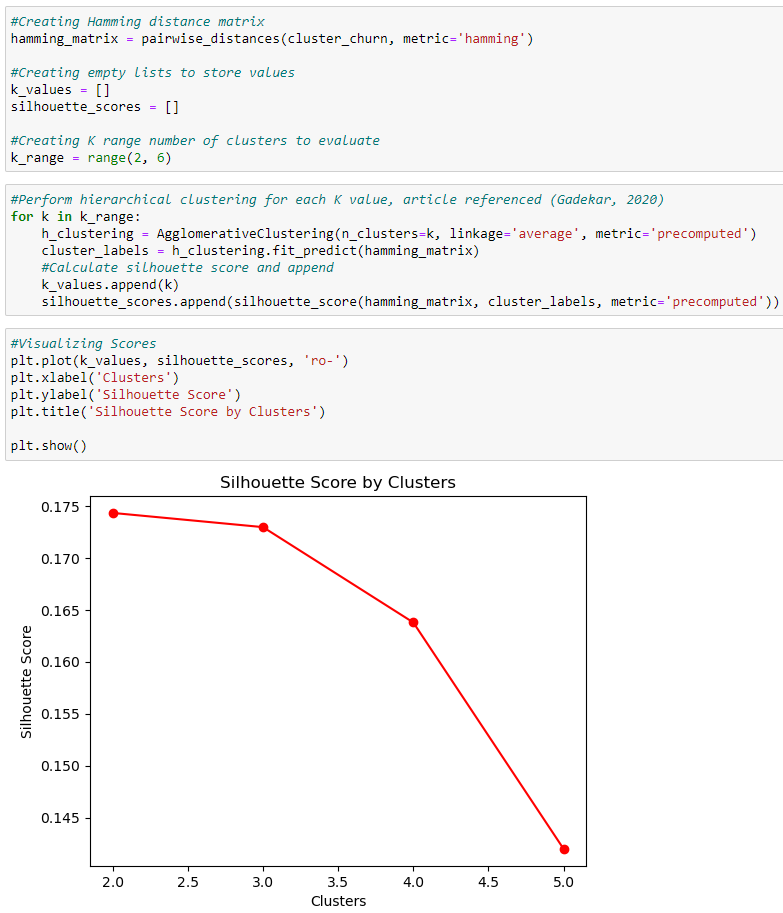
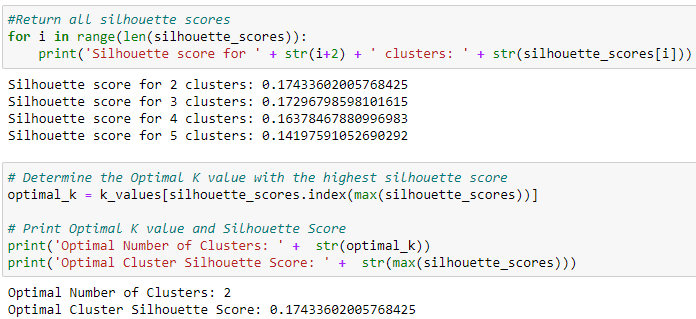

## D2: Code Execution

In [13]:
#Creating Hamming distance matrix 
hamming_matrix = pairwise_distances(cluster_churn, metric='hamming')

#Creating empty lists to store values
k_values = []
silhouette_scores = []

#Creating K range number of clusters to evaluate 
k_range = range(2, 6)

In [14]:
#Perform hierarchical clustering for each K value, article referenced (Gadekar, 2020)
for k in k_range:
    h_clustering = AgglomerativeClustering(n_clusters=k, linkage='average', metric='precomputed')
    cluster_labels = h_clustering.fit_predict(hamming_matrix)
    #Calculate silhouette score and append 
    k_values.append(k)
    silhouette_scores.append(silhouette_score(hamming_matrix, cluster_labels, metric='precomputed'))

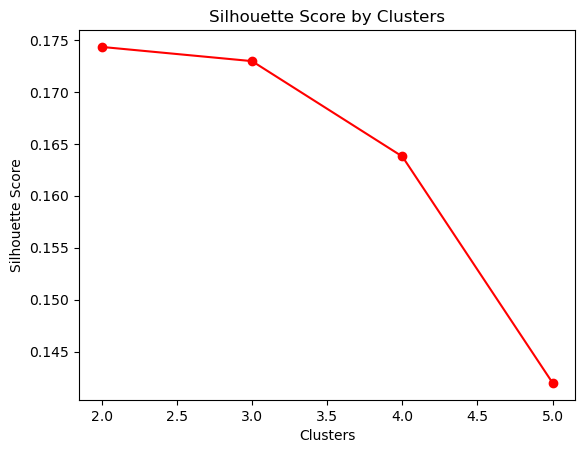

In [15]:
#Visualizing Scores
plt.plot(k_values, silhouette_scores, 'ro-')
plt.xlabel('Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score by Clusters')

plt.show()

In [16]:
#Return all silhouette scores
for i in range(len(silhouette_scores)):
    print('Silhouette score for ' + str(i+2) + ' clusters: ' + str(silhouette_scores[i]))

Silhouette score for 2 clusters: 0.17433602005768425
Silhouette score for 3 clusters: 0.17296798598101615
Silhouette score for 4 clusters: 0.16378467880996983
Silhouette score for 5 clusters: 0.14197591052690292


In [17]:
# Determine the Optimal K value with the highest silhouette score
optimal_k = k_values[silhouette_scores.index(max(silhouette_scores))]

# Print Optimal K value and Silhouette Score
print('Optimal Number of Clusters: ' +  str(optimal_k))
print('Optimal Cluster Silhouette Score: ' +  str(max(silhouette_scores)))

Optimal Number of Clusters: 2
Optimal Cluster Silhouette Score: 0.17433602005768425


## E1: Quality Of The Clustering Technique

The hierarchical clustering technique metric used for quality is the silhouette score as described by Bhardwaj:

    Silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1.
    1: Means clusters are well apart from each other and clearly distinguished.
    0: Means clusters are indifferent, or we can say that the distance between clusters is not significant.
    -1: Means clusters are assigned in the wrong way (Bhardwaj, 2020).

The silhouette scores for the 2-5 clusters ranged from 0.174 to 0.142 with the optimal two clusters having a score of 0.174. All the quality of the clusters were scored closed to being indifferent or not significant.

## E2: Results And Implications

The hierarchical clustering technique had scores that ranged from 0.174 to 0.142, all leading to the conclusion of the analysis being indifferent or not significant. The implication of a not non-significant analysis is to first review all inputs processed through the model. Second, to understand the limitations of the model or if the dataset is the root cause of the insignificance.

## E3: Limitation

A deeper understanding of the calculation of linkage or the similarity between two clusters is implemented in the model. The group average of the data points was utilized during the processing other options were: MIN, MAX, Distance Between Centroids, and Ward's method (Patlolla, 2020). All of the methods come with their pros or cons but doing further analysis between the methods could provide a different result as seen in section E2.

## E4: Course Of Action

Throughout this analysis I can now answer the research question, "Can the hierarchical clustering algorithm significantly segment customers?" No, it cannot significantly segment customers and further analysis will need to be implemented before any decision or strategies can be put in place from these insights. The insignificance can be attributed to the limitations discussed in section E3 and should be thoroughly explored. K-means clustering is also another option for segmenting customers that be explored. 


## F: Panopto Recording
 
https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=e6445183-f69c-4791-81ec-b0b10121d43a

## G: Sources For Third-Party Code

Ebner, J. (2022, March 29). How to use pandas get dummies in python. Sharp Sight. https://www.sharpsightlabs.com/blog/pandas-get-dummies/ 

Gadekar, A. (2020, October 28). Implementation of agglomerative clustering with Scikit-learn. CodeSpeedy. https://www.codespeedy.com/implementation-of-agglomerative-clustering-with-scikit-learn/ 

Moffitt, C. (2017, February 6). Guide to encoding categorical values in&nbsp;python. Practical Business Python Atom. https://pbpython.com/categorical-encoding.html 

Rivera, Alex. (2023). Task 1: Classification Analysis. Unpublished manuscript, Western Governors University.

## H: Sources
 
Bhardwaj, A. (2020, May 27). Silhouette coefficient&nbsp;: Validating clustering techniques. Medium. https://towardsdatascience.com/silhouette-coefficient-validating-clustering-techniques-e976bb81d10c 

Ganji, L. (2023, April 18). One hot encoding in machine learning. GeeksforGeeks. https://www.geeksforgeeks.org/ml-one-hot-encoding-of-datasets-in-python/# 

Lazar, C. (n.d.). Data clustering: A Review - Artificial Intelligence Lab Brussels. https://ai.vub.ac.be/sites/default/files/dataclustering.pdf 

Patlolla, C. R. (2020, May 29). Understanding the concept of hierarchical clustering technique. Medium. https://towardsdatascience.com/understanding-the-concept-of-hierarchical-clustering-technique-c6e8243758ec 